# Cosmic Ray Proton Spectrum Fitting
## DAMPE

In [10]:
from pylab import *
from scipy.optimize import minimize 
from scipy import interpolate

In [11]:
def Phi_twobreaks(E, K, E0, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2):
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    return K * (E/E0)**(-alpha1) * (1 + (E/Eb1)**(1/omega1))**(-delta1 * omega1) * (1 + (E/Eb2)**(1/omega2))**(-delta2 * omega2)

In [12]:
data_DAMPE_H = np.genfromtxt("Data/DAMPE_H_data.txt")
E_DAMPE = data_DAMPE_H[:,1]
flux_DAMPE = data_DAMPE_H[:,3]
#error_DAMPE = data_DAMPE_H[:,4]
error_DAMPE = data_DAMPE_H[:,5]

In [13]:
E = E_DAMPE
Flux = flux_DAMPE
Sigma = 2*error_DAMPE

# To have the same number of degrees of freedom as in (Lipari & Vernetto, 2019), lower energy must be 4.5e1 instead of 1e2 GeV
index = np.where(np.logical_and(E>=4.5e1, E<=1e5))
E = E[index]; Flux = Flux[index]; Sigma = Sigma[index]

# Check number of degrees of freedom
print('# data points used:', 17)
print('# actual data points:', len(Flux))

def Chi_DAMPE(parameters):
    K, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2 = parameters
    Phi_model = Phi_twobreaks(E, K, 2 * 1e3, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2)
    return sum( (Phi_model - Flux)**2 / Sigma**2 ) 

# data points used: 17
# actual data points: 17


In [14]:
# Check of chi^2 with reported value
alpha1_bestfit_DAMPE = 2.75
alpha2_bestfit_DAMPE = 2.58
alpha3_bestfit_DAMPE = 2.86
Eb1_bestfit_DAMPE = 0.574 * 1e3 #GeV
Eb2_bestfit_DAMPE = 12.8 * 1e3 #GeV
omega1_bestfit_DAMPE = 0.35
omega2_bestfit_DAMPE = 0.37
K_bestfit_DAMPE = 1.15 * 10**(-5) #(GeV m2 s sr)-1

parameters_bestfit_DAMPE = K_bestfit_DAMPE, alpha1_bestfit_DAMPE, alpha2_bestfit_DAMPE, alpha3_bestfit_DAMPE, omega1_bestfit_DAMPE, omega2_bestfit_DAMPE, Eb1_bestfit_DAMPE, Eb2_bestfit_DAMPE
print('Min chi^2 from Lipari & Vernetto:', 6.4)
print('Computed chi^2:', Chi_DAMPE(parameters_bestfit_DAMPE) )

Min chi^2 from Lipari & Vernetto: 6.4
Computed chi^2: 0.04616217164256438


In [15]:
# Minimization of chi^2
#bounds_range = ((1e-5,2e-5),(2,3),(2,3),(2,3),(0.0001,1),(0.0001,1),(1e2,1e3),(1e4,1e5))
output = minimize(Chi_DAMPE, (K_bestfit_DAMPE, alpha1_bestfit_DAMPE, alpha2_bestfit_DAMPE, alpha3_bestfit_DAMPE, omega1_bestfit_DAMPE, omega2_bestfit_DAMPE, Eb1_bestfit_DAMPE, Eb2_bestfit_DAMPE), method='L-BFGS-B')
best_fit_values = output['x']

# Best fit values
print('LIPARI & VERNETTO BEST FIT VALUES:')
print('K:', round(K_bestfit_DAMPE,7)); 
print('alpha_1:', round(alpha1_bestfit_DAMPE,3)); print('alpha_2:', round(alpha2_bestfit_DAMPE,3)); print('alpha_3:', round(alpha3_bestfit_DAMPE,3))
print('omega:', round(omega1_bestfit_DAMPE,3)); print('omega2:', round(omega2_bestfit_DAMPE,3))
print('E_b:', round(Eb1_bestfit_DAMPE,4), 'GeV'), print('E_b2:', round(Eb2_bestfit_DAMPE,4), 'GeV')
print('')

print('MY BEST FIT VALUES:')
print('K:', round(best_fit_values[0],7))
print('alpha_1:', round(best_fit_values[1],3)); print('alpha_2:', round(best_fit_values[2],3)); print('alpha_3:', round(best_fit_values[3],3))
print('omega1:', round(best_fit_values[4],3)); print('omega2:', round(best_fit_values[5],3))
print('E_b1:', round(best_fit_values[6],3), 'GeV'); print('E_b2:', round(best_fit_values[7],3), 'GeV')
print('')

min_chi = Chi_DAMPE(best_fit_values)
print('chi^2_min:', round(min_chi,7))

LIPARI & VERNETTO BEST FIT VALUES:
K: 1.15e-05
alpha_1: 2.75
alpha_2: 2.58
alpha_3: 2.86
omega: 0.35
omega2: 0.37
E_b: 574.0 GeV
E_b2: 12800.0 GeV

MY BEST FIT VALUES:
K: 1.13e-05
alpha_1: 2.758
alpha_2: 2.574
alpha_3: 2.86
omega1: 0.35
omega2: 0.369
E_b1: 574.0 GeV
E_b2: 12800.0 GeV

chi^2_min: 0.016852


In [35]:
def Errors_DAMPE(n):
    
    alpha1 = 2.75
    alpha2 = 2.58
    alpha3 = 2.86
    Eb1 = 0.574 * 1e3 #GeV
    Eb2 = 12.8 * 1e3 #GeV
    omega1 = 0.35
    omega2 = 0.37
    K = 1.15 * 10**(-5) #(GeV m2 s sr)-1
    output = minimize(Chi_DAMPE, (K, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 250):
        scan[i] = fit - (fit / 1000)*i
    for j in range(250, 500):
        scan[j] = fit + (fit / 1000)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_DAMPE(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_DAMPE(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Find value for which chi^2 is equal to one
yToFind = 9.30

# Error of normilization
scan, fit, chi_sqrd = Errors_DAMPE(0)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('K'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of first index
scan, fit, chi_sqrd = Errors_DAMPE(1)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#Error of second index
scan, fit, chi_sqrd = Errors_DAMPE(2)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha2'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

#Error of third index
scan, fit, chi_sqrd = Errors_DAMPE(3)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('alpha3'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

K
Lower error: 1.568857791683871e-06
Upper error: 1.5692683272701708e-06
alpha1
Lower error: 0.07428892281296706
Upper error: 0.459817568280914
alpha2
Lower error: 0.0780373772420675
Upper error: 0.12835141005238615
alpha3
Lower error: 0.23559983217800262
Upper error: 0.3892191153939826


In [40]:
def Errors_DAMPE(n):
    
    alpha1 = 2.75
    alpha2 = 2.58
    alpha3 = 2.86
    Eb1 = 0.574 * 1e3 #GeV
    Eb2 = 12.8 * 1e3 #GeV
    omega1 = 0.35
    omega2 = 0.37
    K = 1.15 * 10**(-5) #(GeV m2 s sr)-1
    output = minimize(Chi_DAMPE, (K, alpha1, alpha2, alpha3, omega1, omega2, Eb1, Eb2), method='L-BFGS-B')
    best_fit_values = output['x']
    
    scan = np.zeros(500)
    fit = best_fit_values[n]
    for i in range(0, 90):
        scan[i] = fit - (fit / 100)*i
    for j in range(90, 500):
        scan[j] = fit + (fit / 100)*j
    scan = np.sort(scan)
    
    true_best_fit = Chi_DAMPE(best_fit_values)
    chi_sqrd = np.zeros(500)
    for k in range(0, 500):
        best_fit_values[n] = scan[k]
        scan_chi = Chi_DAMPE(best_fit_values)
        chi_sqrd[k] = np.abs(true_best_fit - scan_chi)
    return scan, fit, chi_sqrd

# Error of first break energy
scan, fit, chi_sqrd = Errors_DAMPE(6)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('Eb1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

# Error of second break energy
scan, fit, chi_sqrd = Errors_DAMPE(7)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('Eb1'); print('Lower error:', fit - scan_interval[0]); print('Upper error:', scan_interval[1] - fit)

Eb1
Lower error: 347.4864339365494
Upper error: 1662.8036333627401
Eb1
Lower error: 9247.791530525583
Upper error: 44929.823049447186


omega1
Upper error: 1.4925978536474034
omega2
Upper error: 1.4553969944249803


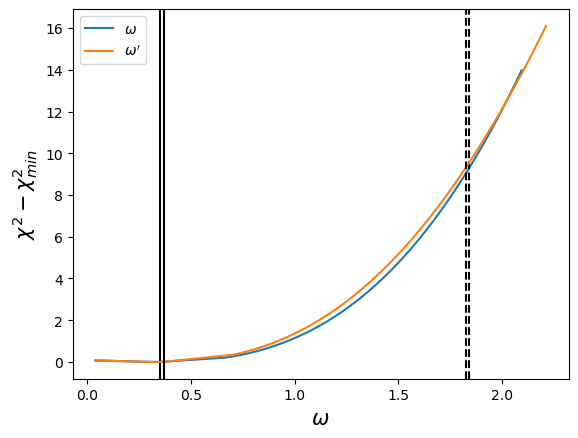

In [48]:
# Error of first width
scan, fit, chi_sqrd = Errors_DAMPE(4)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega1'); print('Upper error:', scan_interval[0] - fit)

# Check chi^2 - chi^2_min distribution
plt.plot(scan, chi_sqrd, label=r'$\omega$')
plt.xlabel(r'$\omega$', fontsize=15)
plt.ylabel(r'$\chi^2 - \chi^2_{min}$', fontsize=15)
plt.axvline(x = fit, color='black')
plt.axvline(x = scan_interval[0], linestyle='--', color='black')

# Error of second width
scan, fit, chi_sqrd = Errors_DAMPE(5)
yreduced = np.array(chi_sqrd) - yToFind
freduced = interpolate.UnivariateSpline(scan, yreduced, s=0)
scan_interval = freduced.roots()
print('omega2'); print('Upper error:', scan_interval[0] - fit)

# Check chi^2 - chi^2_min distribution
plt.plot(scan, chi_sqrd, label=r"$\omega'$")
plt.xlabel(r'$\omega$', fontsize=15)
plt.ylabel(r'$\chi^2 - \chi^2_{min}$', fontsize=15)
plt.axvline(x = fit, color='black')
plt.axvline(x = scan_interval[0], linestyle='--', color='black')
plt.legend()

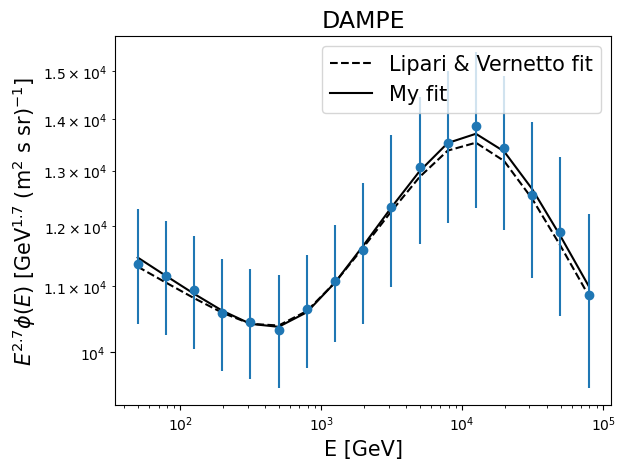

In [49]:
# Lipari & Vernetto
Phi_model = Phi_twobreaks(E, K_bestfit_DAMPE, 2 * 1e3, alpha1_bestfit_DAMPE, alpha2_bestfit_DAMPE, alpha3_bestfit_DAMPE, omega1_bestfit_DAMPE, omega2_bestfit_DAMPE, Eb1_bestfit_DAMPE, Eb2_bestfit_DAMPE)
# Me
Phi_fit = Phi_twobreaks(E, best_fit_values[0], 2 * 1e3, best_fit_values[1], best_fit_values[2], best_fit_values[3], best_fit_values[4], best_fit_values[5], best_fit_values[6], best_fit_values[7])

plt.figure()
plt.plot(E, Phi_model * E**2.7, linestyle='--', color='black', label='Lipari & Vernetto fit')
plt.plot(E, Phi_fit * E**2.7, color='black', label='My fit')
plt.errorbar(E_DAMPE[index], flux_DAMPE[index] * E_DAMPE[index]**2.7, yerr=error_DAMPE[index] * E_DAMPE[index]**2.7, fmt='o')
plt.loglog()
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=15)
plt.xlabel('E [GeV]', fontsize=15)
plt.title('DAMPE', fontsize=17)
plt.legend(fontsize=15)
plt.savefig('Fits/DAMPE_fit.png')